<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing

## Import Libraries & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
t_data = pd.read_csv("train.csv")


## Data Exploration

In [ ]:
t_data.head(-5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500


In [ ]:
t_data.shape

(1460, 81)

In [ ]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Check categorical columns (Qulitative Values)

t_data.select_dtypes(include= "object").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
len(t_data.select_dtypes(include= "object").columns)

43

In [ ]:
#Check numerical columns (Quantitative Values)

t_data.select_dtypes(include= ["int64", "float64"]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
len(t_data.select_dtypes(include= ["int64", "float64"]).columns)

38

In [ ]:
# Statistical Summary

t_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Dealing With Missing Data and NaN

In [ ]:
# check for missing Data

t_data.isnull().values.any()

True

In [ ]:
# Check for number of missing values
t_data.isnull().values.sum()

6965

In [ ]:
# Check for Missing/ Null values in each column
t_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
# Checking for NaN values

t_data.isna().values.any()

True

In [ ]:
# Check for Missing/ NaN values in each column
t_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

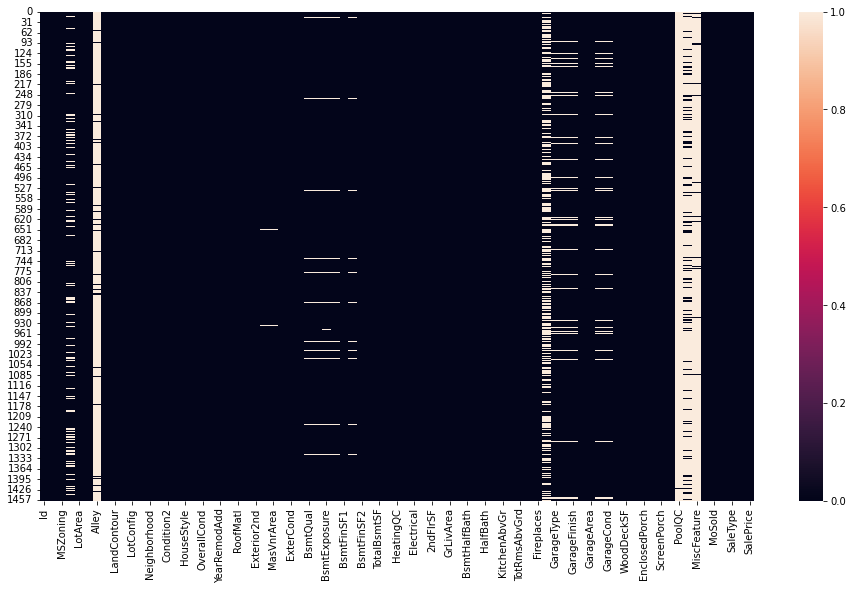

In [ ]:
# Checking null values with Heatmap

plt.figure(figsize=(16,9))
sns.heatmap(t_data.isnull())
plt.show()

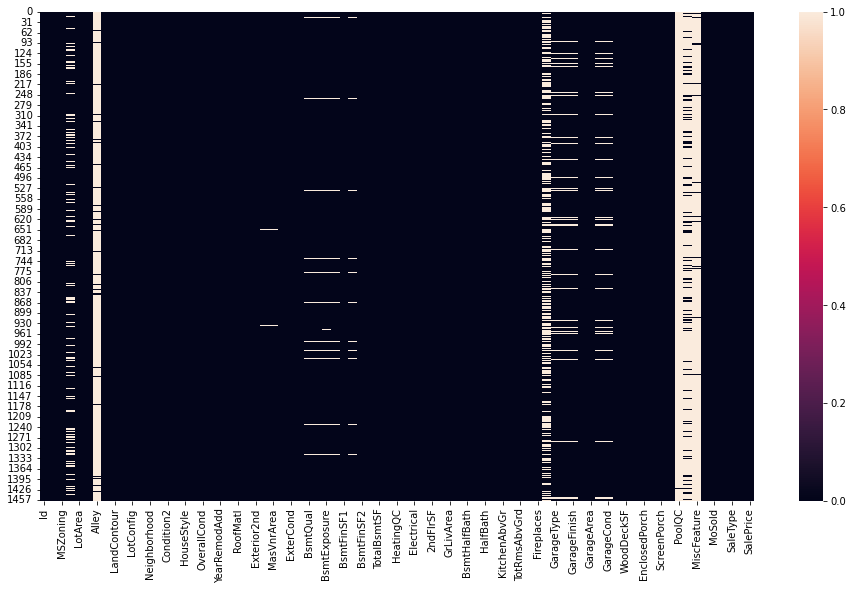

In [ ]:
# Checking NaN values with Heatmap

plt.figure(figsize=(16,9))
sns.heatmap(t_data.isna())
plt.show()

In [ ]:
# Calculatiing Percentage of Null Values in each column

null_percent = t_data.isnull().sum() / t_data.shape[0] * 100

# Missing values / total values * 100

In [ ]:
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

## Dropping Null/NaN values

In [ ]:
# Dropping Cloumns with more than 50% null values.

In [ ]:
cols_to_drop = null_percent[null_percent > 50].keys()


In [ ]:
cols_to_drop

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
# Dropping columns

t_data = t_data.drop(columns= ['Alley', 'PoolQC', 'Fence', 'MiscFeature'] )

In [ ]:
t_data.shape

(1460, 77)

In [ ]:
# Checking columns of dataset for missing Values again

t_data_miss = t_data.columns[t_data.isnull().any()]

In [ ]:

t_data_miss

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [ ]:
len(t_data_miss)

15

In [ ]:
t_data.head(-5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,WD,Abnorml,84500


In [ ]:
#Check numerical columns (Quantitative Values)
 #Select only the columns with missing values that are of type int64 or float64

In [ ]:
numerical_cols = [col for col in t_data_miss if col not in ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]


In [ ]:
numerical_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

## Numerical Columm Mean placement

In [ ]:
# Now we have the numerical columns with missing values
# To fill up the missing fields, we add the "mean"

In [ ]:
t_data["LotFrontage"] = t_data["LotFrontage"].fillna(t_data["LotFrontage"].mean())
t_data["MasVnrArea"] = t_data["MasVnrArea"].fillna(t_data["MasVnrArea"].mean())
t_data["GarageYrBlt"] = t_data["GarageYrBlt"].fillna(t_data["GarageYrBlt"].mean())

In [ ]:
# Check length of missing values currently

t_data_miss = t_data.columns[t_data.isnull().any()]
len(t_data_miss)

12

## Categorical Columm Mode placement

In [ ]:
# Now we have the numerical columns resolved with mean values
# To fill up the missing fields, in the Categorical columns we add the "mode"

In [ ]:
# Recall all Categorical Columns

t_data.select_dtypes(include= "object").columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# Verify missing Columns

t_data.columns[t_data.isnull().any()]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [ ]:
# Check Length

len(t_data.columns[t_data.isnull().any()])

12

In [ ]:
# Writing a For loop to fill in all missing categorical columns with their modes

In [ ]:
for col in ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:


    t_data[col] = t_data[col].fillna(t_data[col].mode()[0])


In [ ]:
t_data[col]

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

In [ ]:
# Check to see if there are any other column with missing data

# check for missing Data

t_data.isnull().values.any()

False

In [ ]:
len(t_data.columns[t_data.isnull().any()])


0

## Distplot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


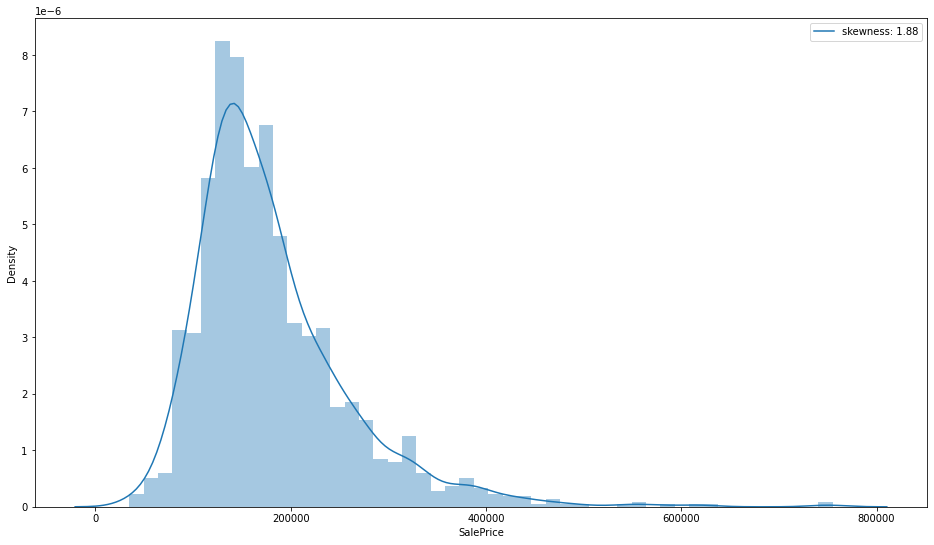

In [ ]:
# Distplot of the targetr Variable

plt.figure(figsize= (16,9))
bar = sns.distplot(t_data["SalePrice"])
bar.legend(["skewness: {:.2f}".format(t_data["SalePrice"].skew())])
plt.show()



## Correlation Matrix & Heat Map

In [ ]:
# Droping the Target Variable ( "SalePrice") which is the dependent variable.

t_data_2 = t_data.drop(columns= "SalePrice")



In [ ]:
# Check the shape
t_data_2.shape

(1460, 76)

## Correlation Matrix

<AxesSubplot:title={'center':'Independent Variables Correlation with Dependent(Target Variable-Saleprice)'}>

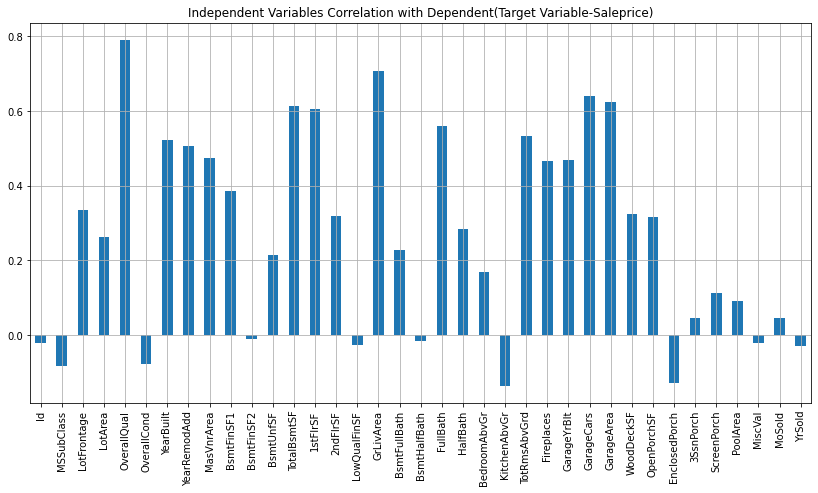

In [ ]:
# Running Correlation of all independent variables with the target column "charges"

t_data_2.corrwith(t_data["SalePrice"]).plot.bar(figsize=(14,7), title= "Independent Variables Correlation with Dependent(Target Variable-Saleprice)",
                                                rot= 90, grid= True)

## Heat-Map

In [ ]:
# Define a correlation Variable
corr = t_data_2.corr()

<AxesSubplot:>

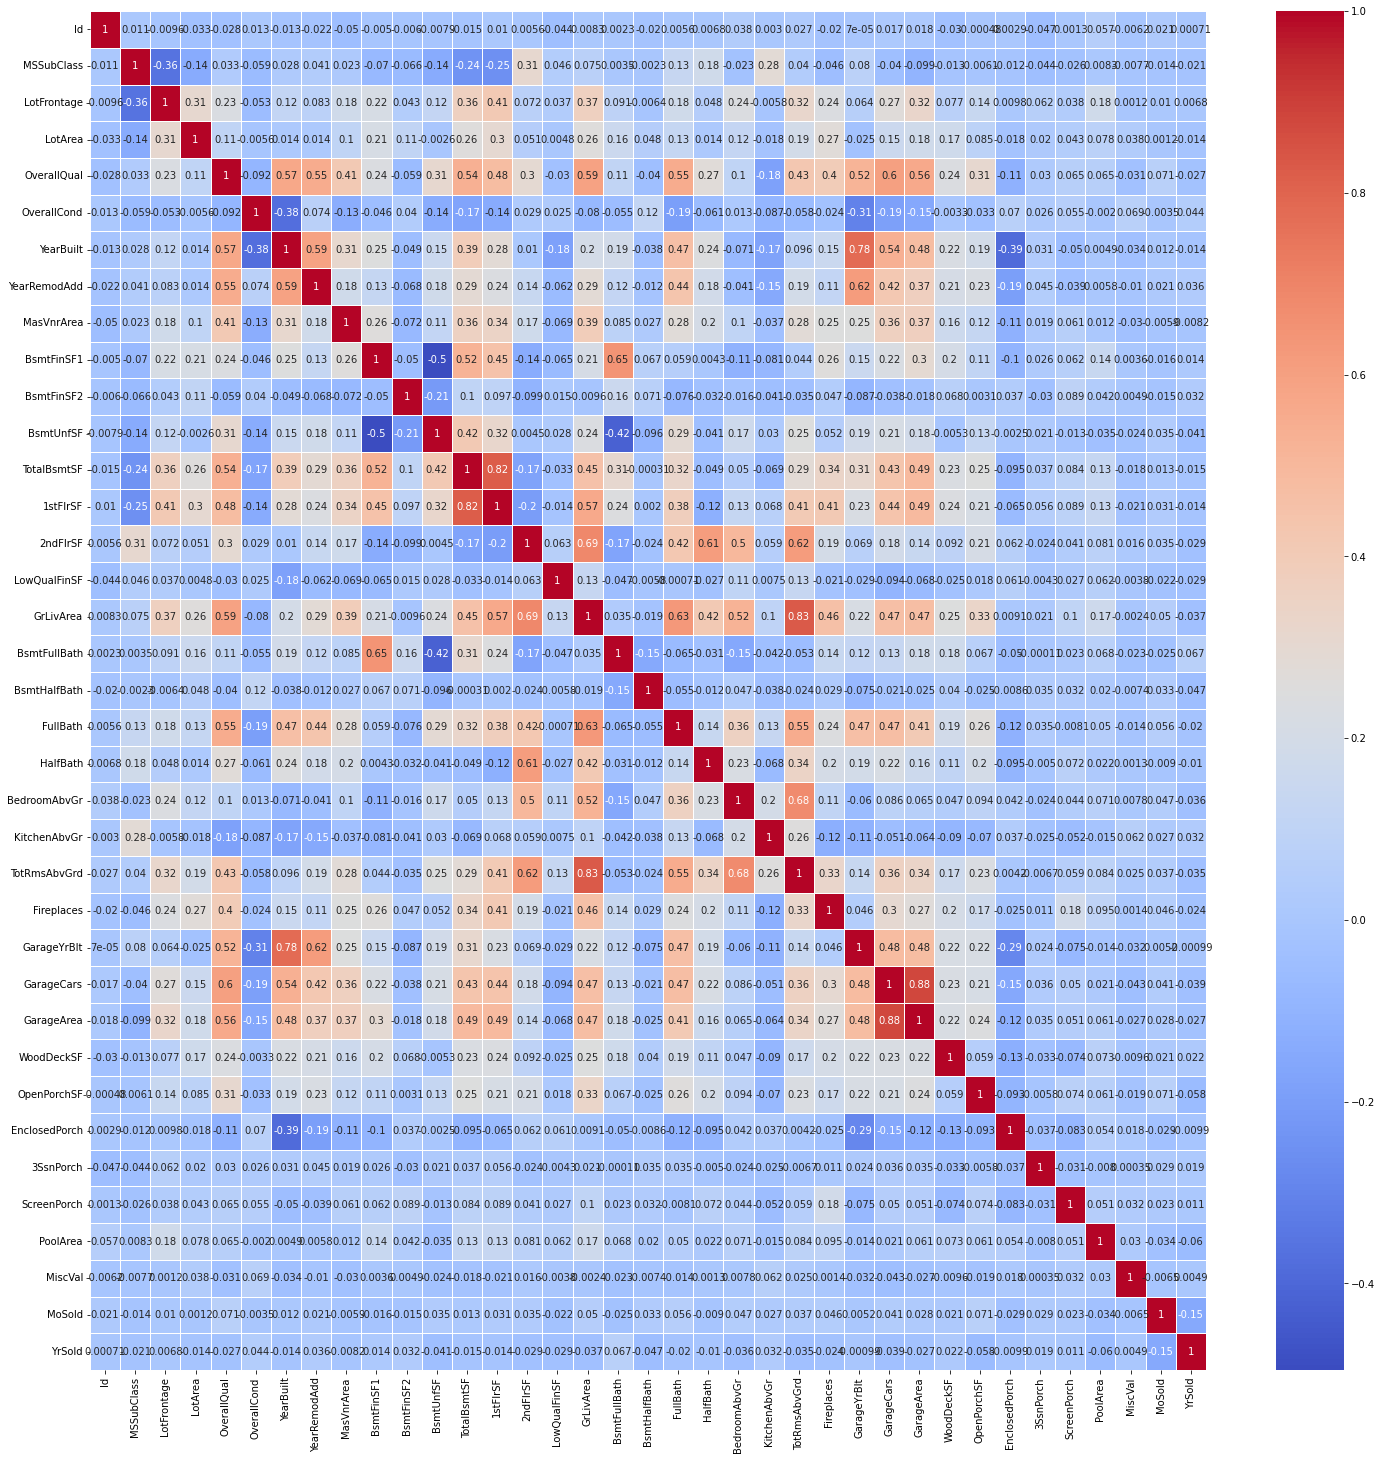

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, cmap= "coolwarm", linewidths= 1, annot= True,)

In [ ]:
# Getting variables that are highly correlated

high_corr = t_data.corr()

high_corr_features = high_corr.index[abs(high_corr["SalePrice"]) > 0.5]

In [ ]:
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [ ]:
len(high_corr_features)

11

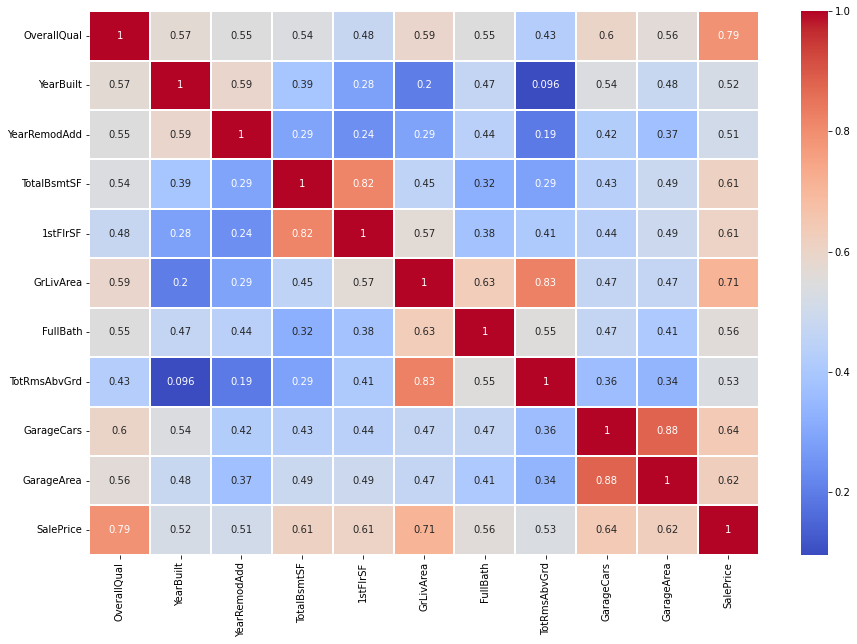

In [ ]:
# Heatmap of High_corr

# Define a correlation Variable
corr_1 = t_data[high_corr_features].corr()

plt.figure(figsize=(15,10))
ax = sns.heatmap(data= corr_1, cmap= "coolwarm", linewidths= 2, annot= True,)

## Dealing With The Categorical Values

In [ ]:
# check shape of comprehensive dataset

t_data.shape

(1460, 77)

In [ ]:
# Recall Categorical Columns are :
t_data.select_dtypes(include= "object").columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
len(t_data.select_dtypes(include= "object").columns)

39

In [ ]:
# All Categoricals columns require encoding

## One Hot Encoding

In [ ]:
t_data_ohe = pd.get_dummies(data= t_data, drop_first= True)

In [ ]:
t_data_ohe.shape

(1460, 238)

In [ ]:
# Verify by checking if any categorical columns still exist

t_data_ohe.select_dtypes(include= "object").columns

Index([], dtype='object')

##Dataset Splitting

In [ ]:
t_data_ohe.head(-5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,90,60.0,9000,5,5,1974,1974,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1451,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,0,0,1,0,0,0,0,0,0,1
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,0,0,0,0,1,0,0,0,1,0
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Matrix of Features

# Droping the Target Variable ( "charges")-which is the dependent variable.

t_data_3 = t_data_ohe.drop(columns="SalePrice")

# "t_data_3 are all the independent variables"

In [ ]:
x = t_data_3

In [ ]:
# The (Target)-Dependent Variable.

y = t_data_ohe["SalePrice"]


In [ ]:
# SPLITTING THE DATA
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split (x, y, test_size= 0.2, random_state= 0)

In [ ]:
a= x_train.shape
b= x_test.shape

print(a,b)

(1168, 237) (292, 237)


In [ ]:
c= y_train.shape
d= y_test.shape

print(c,d)

(1168,) (292,)


## Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating an Instance of the StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.28399978, -0.86836547,  0.9786782 , ..., -0.10188534,
        -2.20665963,  3.30429529],
       [ 0.31396549, -0.86836547, -0.46715589, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-1.53213363, -0.63114155,  0.4967335 , ..., -0.10188534,
         0.45317365, -0.30263639],
       ...,
       [ 1.13498129,  0.79220197, -0.08160014, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.42399958,  1.50387373,  0.01719652, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.12738983,  0.08053021, -0.56354483, ..., -0.10188534,
         0.45317365, -0.30263639]])

In [ ]:
x_test

array([[-0.49518592, -0.86836547,  0.01719652, ..., -0.10188534,
        -2.20665963, -0.30263639],
       [-0.58535529, -0.15669371,  0.44853903, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.66128739, -0.15669371,  0.01719652, ..., -0.10188534,
         0.45317365, -0.30263639],
       ...,
       [ 1.54074343, -0.15669371, -0.46715589, ...,  9.81495458,
        -2.20665963, -0.30263639],
       [ 1.38887924, -0.63114155, -0.94910059, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-1.60569284,  0.43636609, -0.46715589, ..., -0.10188534,
         0.45317365, -0.30263639]])

# Model Building

## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create an instance ( Linear Regressor)

regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Make the predicitions

y_pred = regressor_mlr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

-3.5400367536523465e+21

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create an instance ( Random Forest Regression)

regressor_rf =RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor_rf.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.8367456621285623

## XGBoost Regression

In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
# Create an instance ( XGBoost Regressor)

regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [ ]:
# Make a prediction

y_pred = regressor_xgb.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.8165145601598218

# Hyper Parameter Optimisation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = { "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
              "max_depth": [10, 20, 30, 40, 50 ,60, 70, 80, 90, 100, None],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4],
              "max_features": ["auto", "sqrt"],
              "bootstrap": [True, False]


}

In [ ]:
parameters

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]}

In [ ]:
# Create an instance of the class

random_cv = RandomizedSearchCV(estimator= regressor_rf, param_distributions= parameters, n_iter= 50, cv= 5, verbose= 2, n_jobs= -1, random_state= 0)

In [ ]:
# train the model

random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      n_estimators=800)

In [ ]:
random_cv.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [ ]:
random_cv.best_score_

0.8656846167846373

In [ ]:
random_cv.multimetric_

False

# Final Model - (Random Forest Regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance ( Random Forest Regression)
# Copy in best estimator from (random_cv.best_estimator_)

regressor =RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      n_estimators=800)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      n_estimators=800)

In [ ]:
#
y_pred = regressor.predict(x_test)

In [ ]:
# Calculate the R2_score

r2_score(y_test, y_pred)


0.8410049343481036